# Linear Regression and Stochastic Gradient Descent

In [1]:
from sklearn import model_selection
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = datasets.load_svmlight_file('./data/housing_scale', n_features=13)

In [3]:
X_train, X_validate, y_train, y_validate = model_selection.train_test_split(data[0], data[1], random_state = 2018)
X_train = X_train.toarray()
X_validate = X_validate.toarray()

## 1. closed-form solution of Linear Regression 

### 1.1 Initialize linear model $y = w^T  x$

In [4]:
w = np.random.normal(np.zeros(14))

### 1.2 Select loss function
Using L2 Loss:

$loss  = \sum\limits_{i=1}^n(y_i - y_i^{pre})^2$

In [5]:
def loss(y_predict, y_validate):
    res = 0
    n = len(y_validate)
    for i in range(n):
        res += np.power((y_validate[i] - y_predict[i]), 2)
    res /= n
    return res

In [6]:
X_train = np.insert(X_train, 0, values=np.ones(X_train.shape[0]), axis=1)
X_validate = np.insert(X_validate, 0, values=np.ones(X_validate.shape[0]), axis=1)

In [7]:
y = X_train.dot(w)

In [8]:
Loss = loss(y, y_train)

### 1.3 Calculate closed-form solution

$\begin{split}
loss &= \sum_{i=1}^n(y_i - y_i^{pre})^2 \\
     &= (y-Xw)^T(y-Xw) \\
\end{split}$

$\begin{split}
\frac{\partial loss}{\partial w} &= \frac{\partial\left(\left(y-Xw\right)^T\left(y-Xw\right)\right)}{\partial w} \\
&= \frac{\partial \left(y^Ty-w^TX^Ty-y^YXw+w^TX^TXw\right)}{\partial w} \\
&= 0 - X^Ty-X^Ty+2X^TXw \\
&= 2X^T\left(Xw-y\right)
\end{split}$

So 

$w^* = \left(X^TX\right)^{-1}X^Ty$

In [9]:
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train.T)

In [10]:
y_tra = X_train.dot(w)
y_val = X_validate.dot(w)

loss_train = loss(y_tra, y_train)
loss_val = loss(y_val, y_validate)

print(Loss, loss_train, loss_val)

591.0688430207564 23.653942814303953 17.173728167417575


## 2. Linear Regression and Stochastic Gradient Descent

### 2.1 Initialize linear model  $y=w^Tx$

In [11]:
w = np.random.normal(np.zeros(14))

### 2.2 Select loss function
Using:

$J = \frac{1}{2m}\sum\limits_{i=1}^n(y_i - y_i^{pre})^2$

In [12]:
def J(y_predict, y_validate):
    m = len(y_predict)
    return loss(y_predict, y_validate) / 2 / m

### 2.3 Get the derivation of loss function
$\begin{split}
\frac{\partial}{\partial w_i} J(w) &= \frac{\partial}{\partial w_i} \frac{1}{2m} \sum\limits^n_{k=1}(y_k-\Sigma^m_{j=1}w_jx_j)^2 \\
&= \frac{1}{m}\sum\limits^n_{k=1}\left(y_k-\Sigma_{j=1}^nw_jx_{kj}\right)x_{kj}
\end{split}$

So

$\begin{split}
w_i &= w_i - \alpha\frac{\partial}{\partial w_i} loss \\
    &= w_i - \frac{\alpha}{m}\sum\limits^n_{k=1}\left(y_k-\Sigma_{j=1}^nw_jx_{kj}\right)x_{ki}
\end{split}$

In [13]:
def SGD(w, alpha, x, y, iters, x_val, y_val):
    n = x.shape[0]
    m = x.shape[1]
    batch = []
    loss_train = []
    loss_val = []
    for i in range(iters):
        batch.append(np.random.randint(m))
    for l in range(iters):
        tmp = np.zeros_like(w)
        k = batch[l]
        for i in range(m):
            tmp[i] = -(y[k] - w.dot(x[k][:])) * x[k][i]
        for i in range(m):
            w[i] = w[i] - (alpha / m) * tmp[i]
        loss_train.append(loss(x.dot(w), y_train))
        loss_val.append(loss(x_val.dot(w), y_val))
    return w, loss_train, loss_val

### 2.4 Start training w

In [14]:
w, loss_train, loss_val = SGD(w, 1e-2, X_train, y_train, 1000, X_validate, y_validate)

In [15]:
w

array([ 5.98609485, -3.73340252, -4.20099611, -1.45645436, -4.2915328 ,
       -0.55256022,  1.76717383,  1.17415714, -3.02629615, -0.76756771,
        0.13181346, -0.16577666,  4.42656079, -4.1035296 ])

### 2.5 Plot loss_train and loss_val

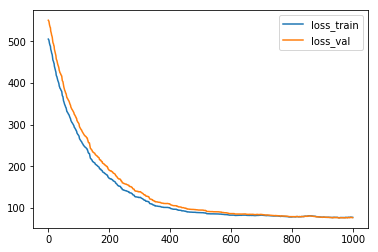

In [16]:
plt.plot(loss_train, label = 'loss_train')
plt.plot(loss_val, label = 'loss_val')
plt.legend(loc='upper right')
plt.savefig('./tex/lab1/SGD.pdf')